In [ ]:
pip install numpy pandas statsmodels PyEMD scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.6/662.6 kB 6.8 MB/s eta 0:00:00


In [ ]:
pip install EMD-signal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.8 MB/s eta 0:00:00


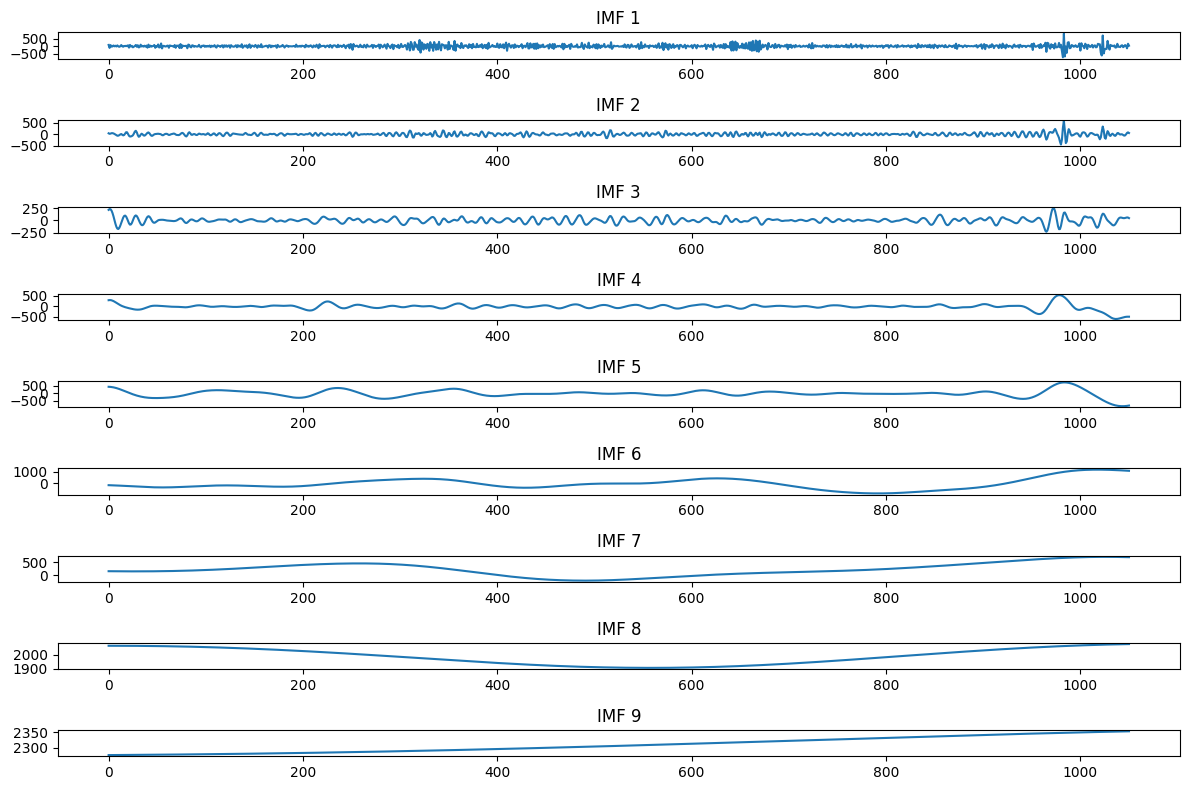

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from PyEMD import EMD, EEMD, CEEMDAN
# Correct way to access the methods
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset (replace with your path if needed)
data = pd.read_csv('merged_output.csv', encoding='utf-8')
data['Reported Date'] = pd.to_datetime(data['Reported Date'])
data = data.sort_values('Reported Date')
daily_data = data.groupby('Reported Date')['Modal Price (Rs./Quintal)'].mean().ffill()

# Split the data into train and test sets
train_size = int(len(daily_data) * 0.8)
train_data = daily_data[:train_size].values
test_data = daily_data[train_size:].values

# Step 1: Apply EEMD on the training data
eemd = EEMD()
imfs = eemd.eemd(train_data)

# Plot IMFs to visualize decomposition
plt.figure(figsize=(12, 8))
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs), 1, i + 1)
    plt.plot(imf)
    plt.title(f'IMF {i + 1}')
plt.tight_layout()
plt.show()

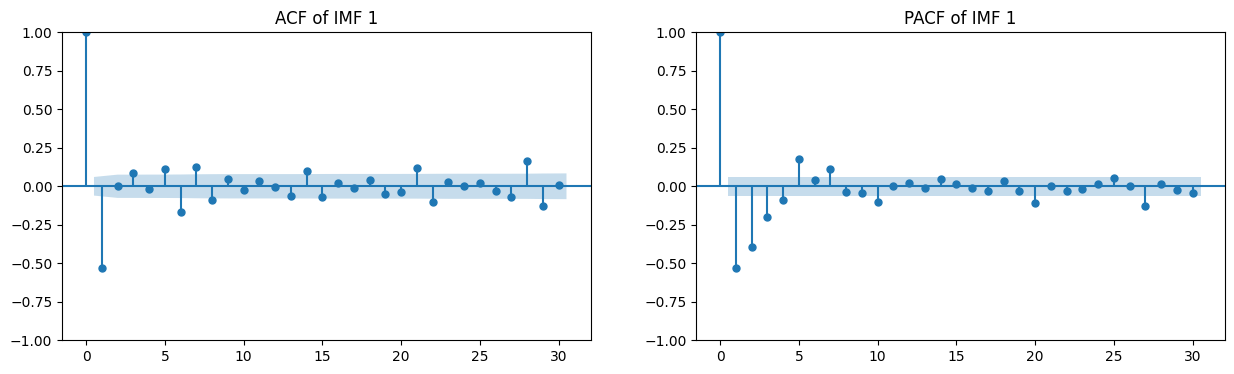

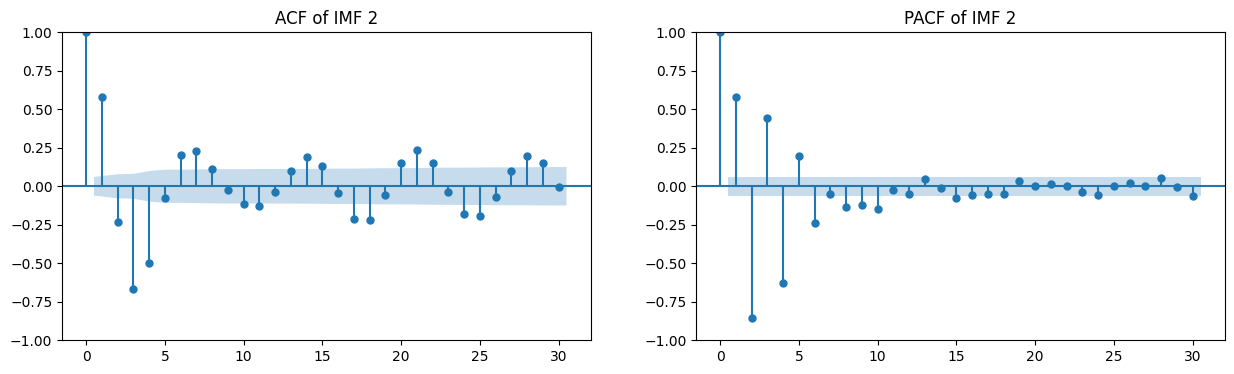

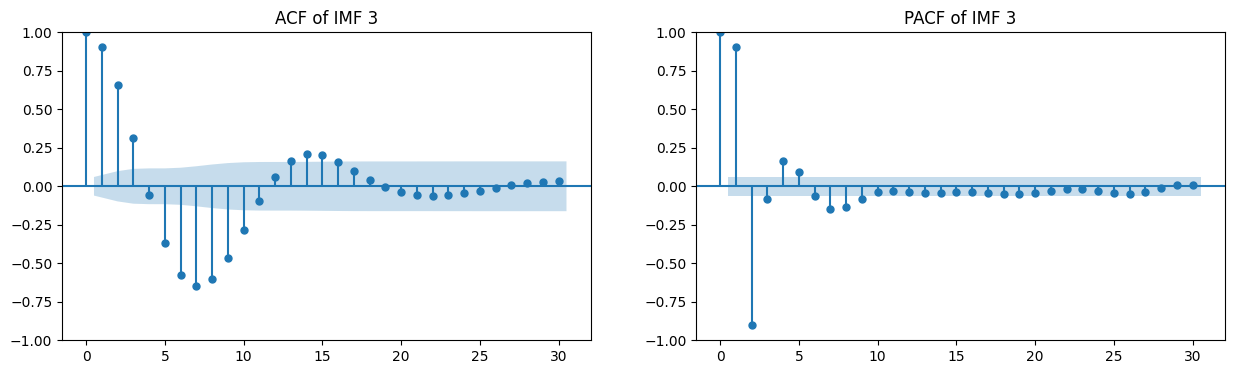

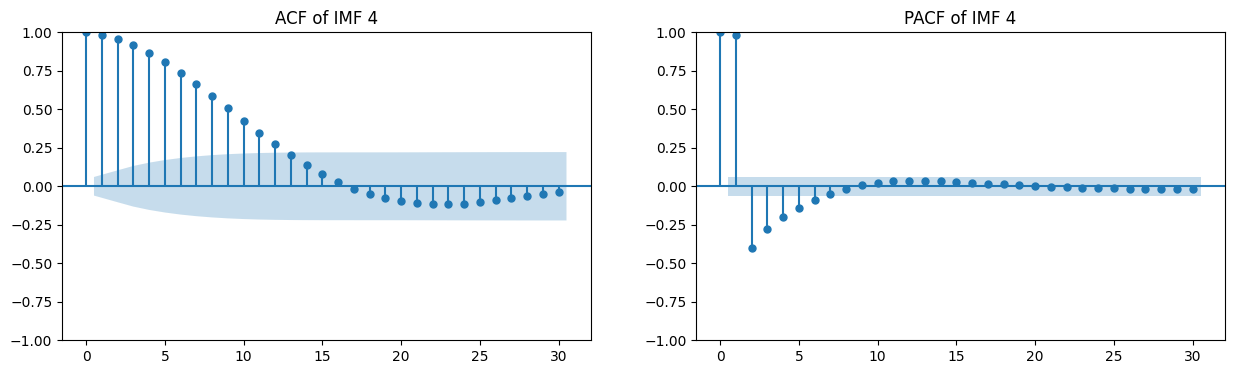

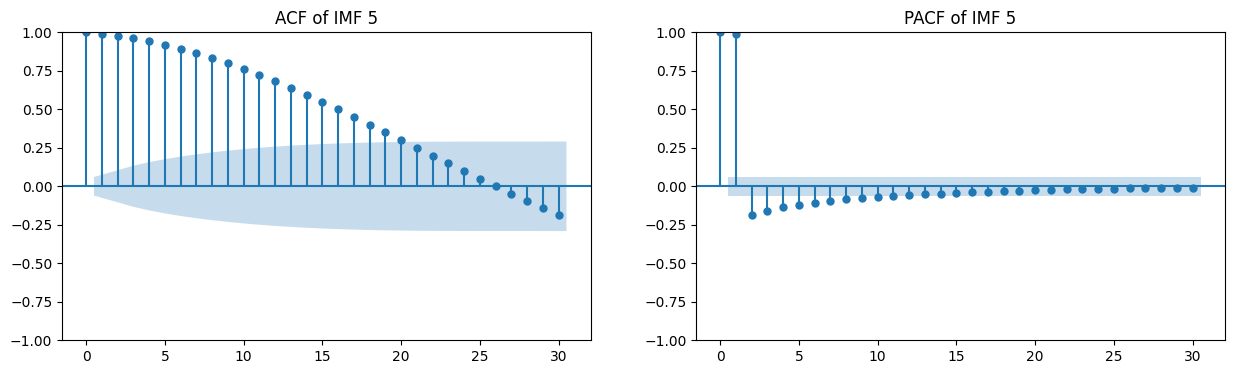

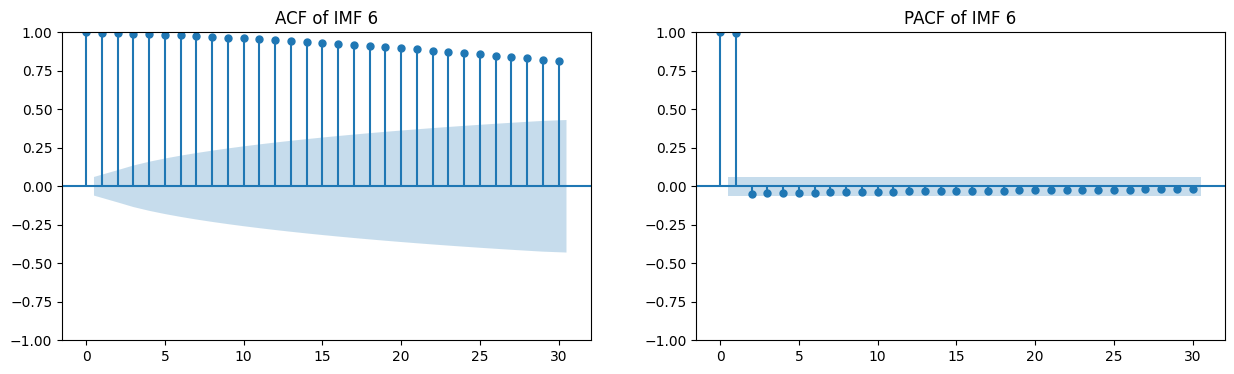

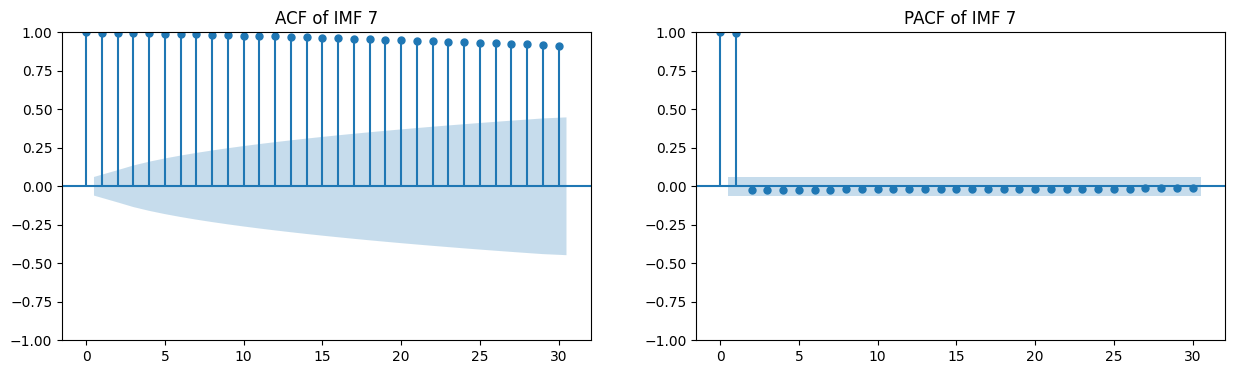

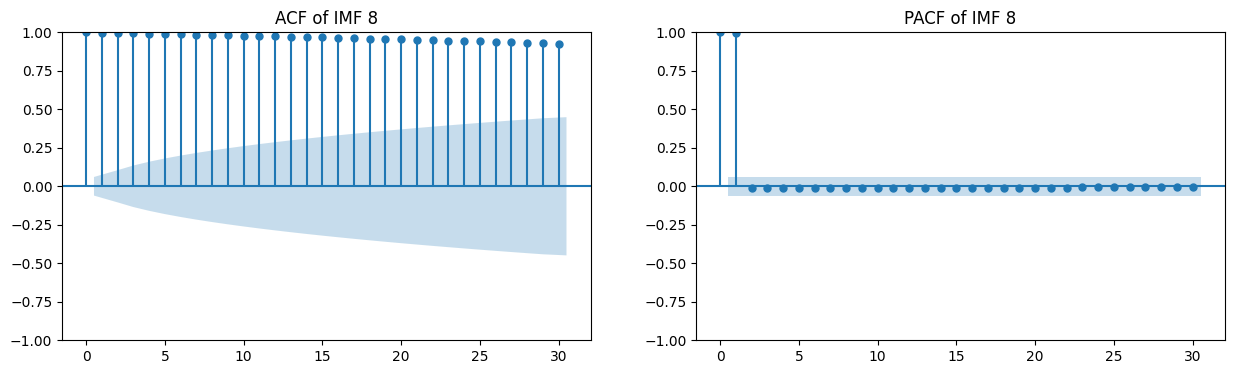

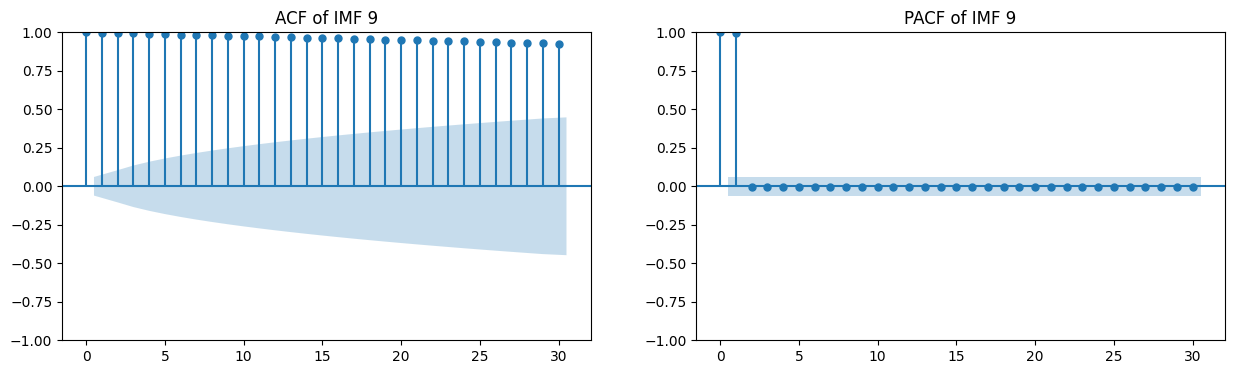

In [ ]:
import statsmodels.api as sm

# Plot ACF and PACF for each IMF
for i, imf in enumerate(imfs):
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))

    # ACF Plot
    sm.graphics.tsa.plot_acf(imf, lags=30, ax=axes[0])
    axes[0].set_title(f'ACF of IMF {i + 1}')

    # PACF Plot
    sm.graphics.tsa.plot_pacf(imf, lags=30, ax=axes[1])
    axes[1].set_title(f'PACF of IMF {i + 1}')

    plt.show()


Fitting ARIMA(1, 0, 1) on IMF 1...
IMF 1 - RMSE: 159.43083733495385
Fitting ARIMA(1, 0, 2) on IMF 2...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


IMF 2 - RMSE: 106.84861580211467
Fitting ARIMA(2, 0, 0) on IMF 3...
IMF 3 - RMSE: 72.94119184569355
Fitting ARIMA(1, 0, 2) on IMF 4...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


IMF 4 - RMSE: 256.8997150241558
Fitting ARIMA(1, 0, 2) on IMF 5...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


IMF 5 - RMSE: 392.98704573349755
Fitting ARIMA(1, 0, 2) on IMF 6...
IMF 6 - RMSE: 1251.0870905796987
Fitting ARIMA(1, 0, 1) on IMF 7...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


IMF 7 - RMSE: 283.0971608408277
Fitting ARIMA(1, 0, 1) on IMF 8...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


IMF 8 - RMSE: 49.55306655552741
Fitting ARIMA(1, 0, 1) on IMF 9...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


IMF 9 - RMSE: 10.36081298705954


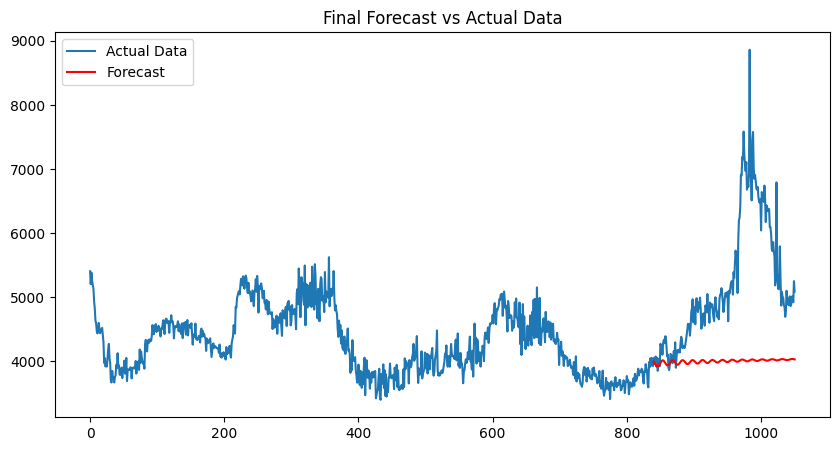

In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define ARIMA orders based on ACF and PACF plots
orders = [
    (1, 0, 1), (1, 0, 2), (2, 0, 0),
    (1, 0, 2), (1, 0, 2), (1, 0, 2),
    (1, 0, 1), (1, 0, 1), (1, 0, 1)
]

# Split each IMF into train and test sets (80% train, 20% test)
train_ratio = 0.8
train_data_list = [imf[:int(len(imf) * train_ratio)] for imf in imfs]
test_data_list = [imf[int(len(imf) * train_ratio):] for imf in imfs]

# List to store forecasts for each IMF
forecasts = []

# Loop through each IMF and fit ARIMA model
for i, (train_data, test_data, order) in enumerate(zip(train_data_list, test_data_list, orders)):
    print(f'Fitting ARIMA{order} on IMF {i + 1}...')

    # Fit the ARIMA model
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()

    # Forecast the same length as the test data
    forecast = model_fit.forecast(steps=len(test_data))
    forecasts.append(forecast)

    # Calculate RMSE for the current IMF
    rmse = np.sqrt(mean_squared_error(test_data, forecast))
    print(f'IMF {i + 1} - RMSE: {rmse}')

# Sum all forecasts to get the final combined forecast
final_forecast = np.sum(forecasts, axis=0)

# Combine train and test data for actual values (sum all IMFs)
actual_data = np.sum([np.concatenate((train, test)) for train, test in zip(train_data_list, test_data_list)], axis=0)

# Plot the final forecast vs actual data
plt.figure(figsize=(10, 5))
plt.plot(range(len(actual_data)), actual_data, label='Actual Data')
plt.plot(range(len(train_data_list[0]), len(actual_data)), final_forecast, label='Forecast', color='red')
plt.legend()
plt.title('Final Forecast vs Actual Data')
plt.show()
